# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get Data

In [3]:
data = pd.read_csv('../../Data_AA2/bank-additional-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Analysis

## Data Distribution of Bank Client Data

#### Age Distribution

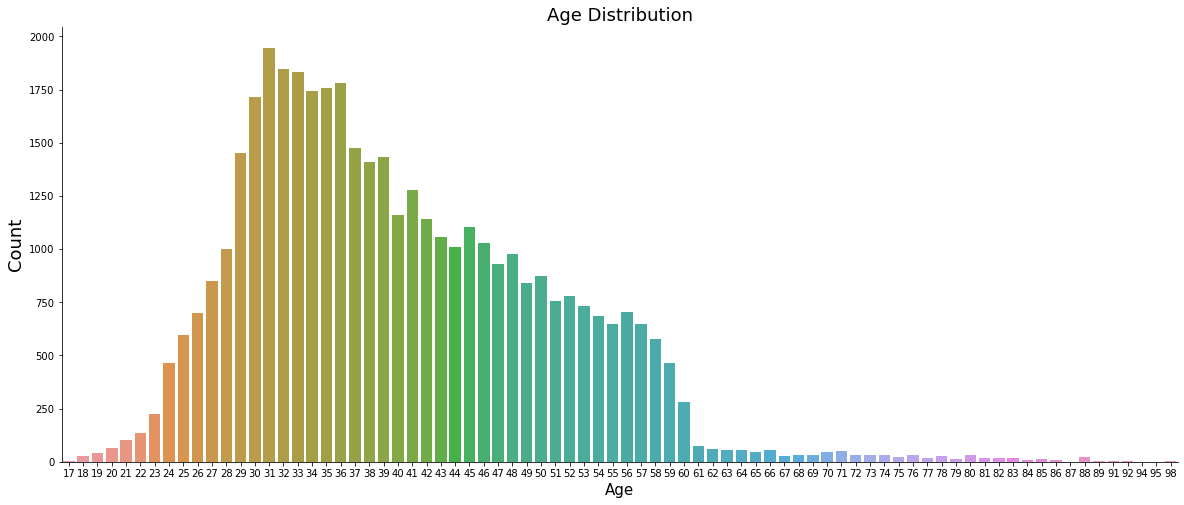

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('Age Distribution', fontsize=18)
sns.despine()

In [87]:
age_range = data.iloc[: , 0:1]
age_range.head()

,age
0,56
1,57
2,37
3,40
4,56


In [88]:
def age(df):
    df.loc[df['age'] <= 19, 'age'] = 1
    df.loc[(df['age'] > 19) & (df['age'] <= 30), 'age'] = 2
    df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age'] = 3
    df.loc[(df['age'] > 60) & (df['age'] <= 98), 'age'] = 4
           
    return df

age(age_range);

3    32895
2     7308
4      910
1       75
Name: age, dtype: int64

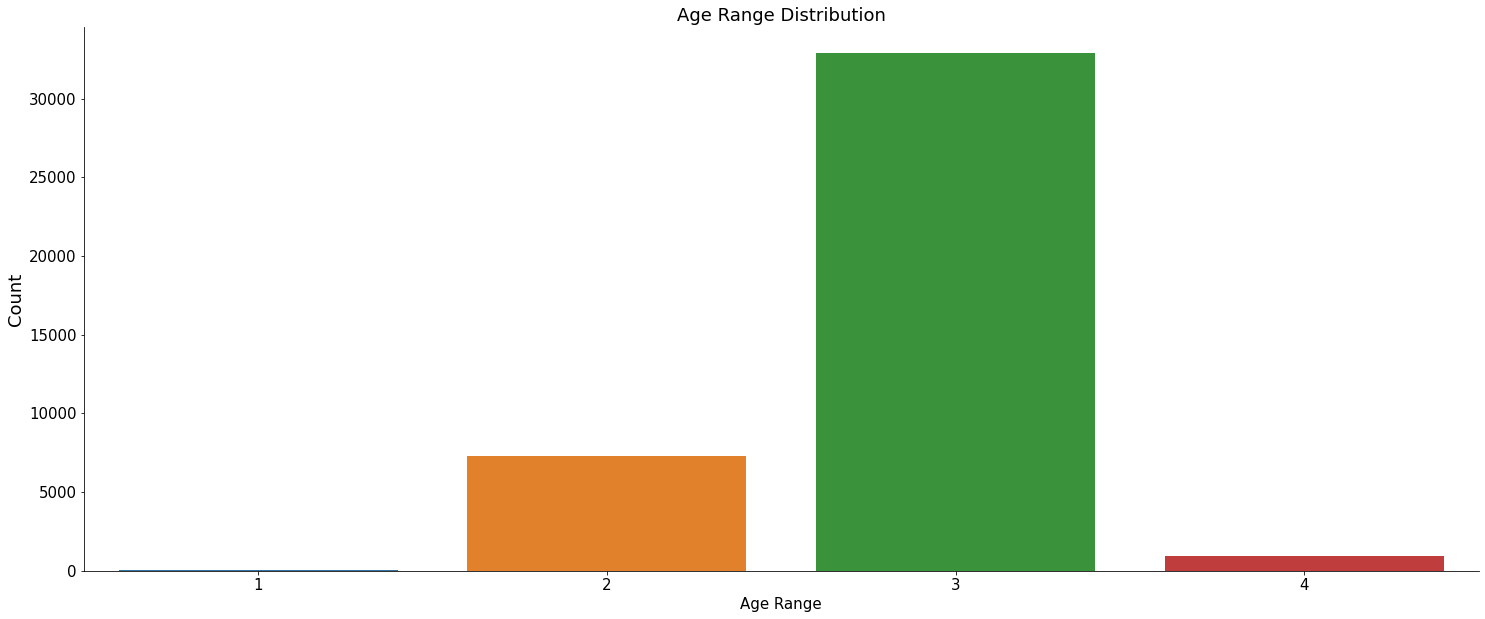

In [89]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'age', data = age_range)
ax.set_xlabel('Age Range', fontsize=15)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('Age Range Distribution', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

age_range['age'].value_counts()

#### Job Distribution

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

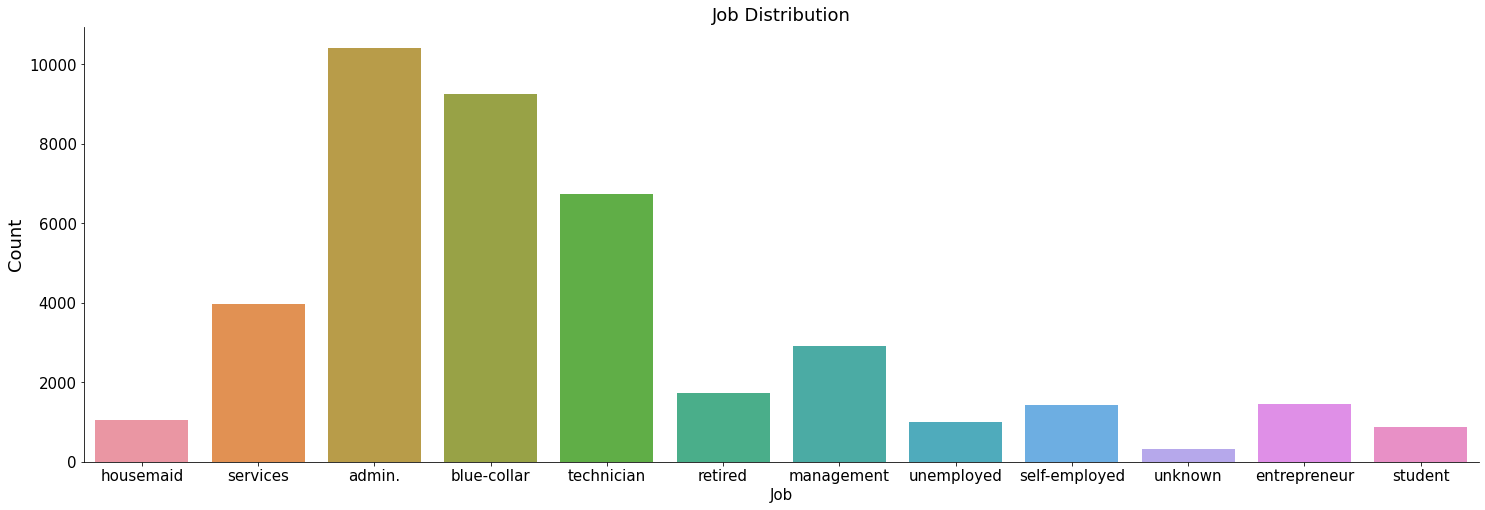

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = data)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('Job Distribution', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['job'].value_counts()

#### Marital Distribution

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

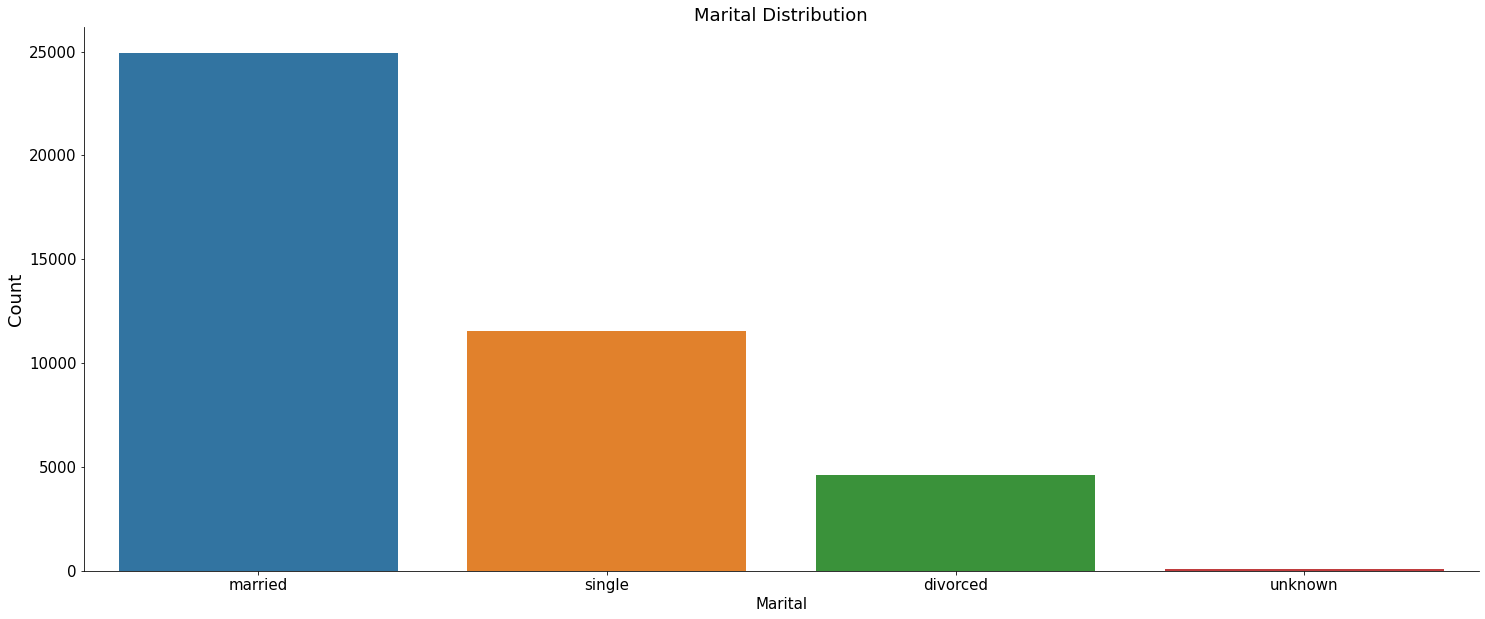

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'marital', data = data)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('Marital Distribution', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['marital'].value_counts()

#### Education Distribution

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

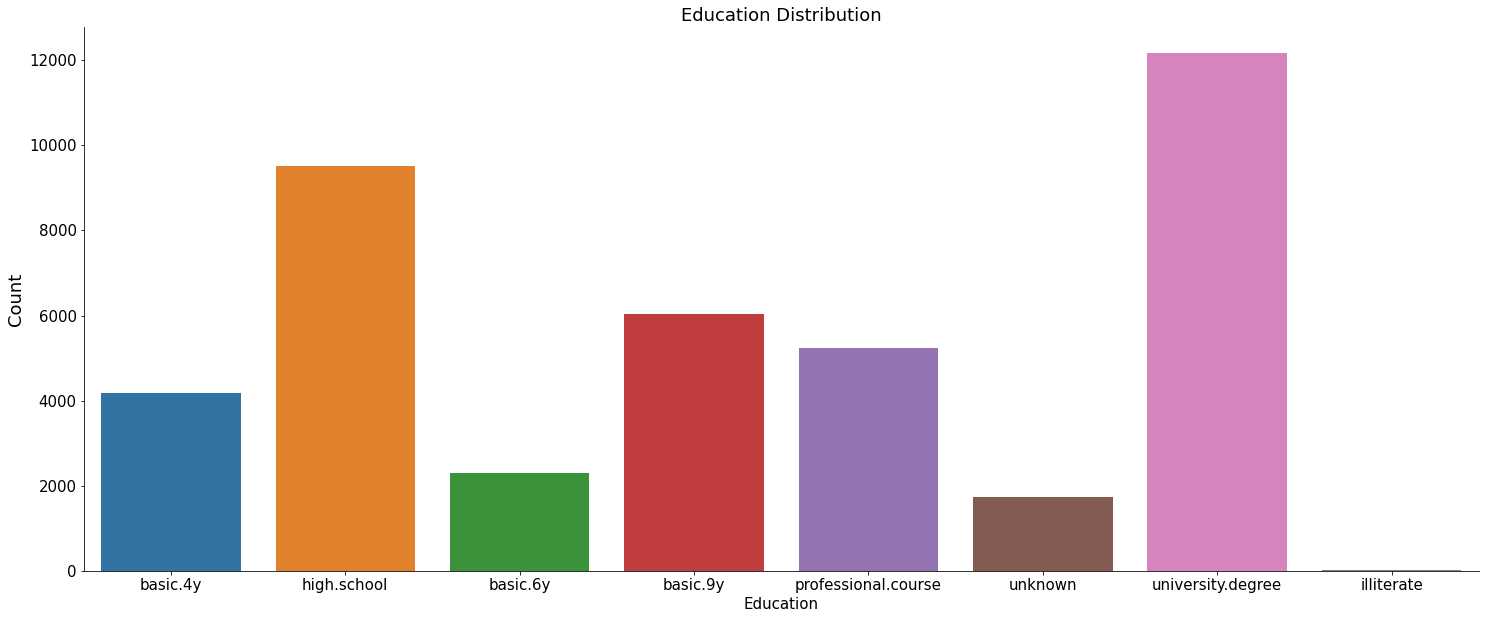

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'education', data = data)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('Education Distribution', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['education'].value_counts()

#### Default Distribution 

Has credit in default?

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

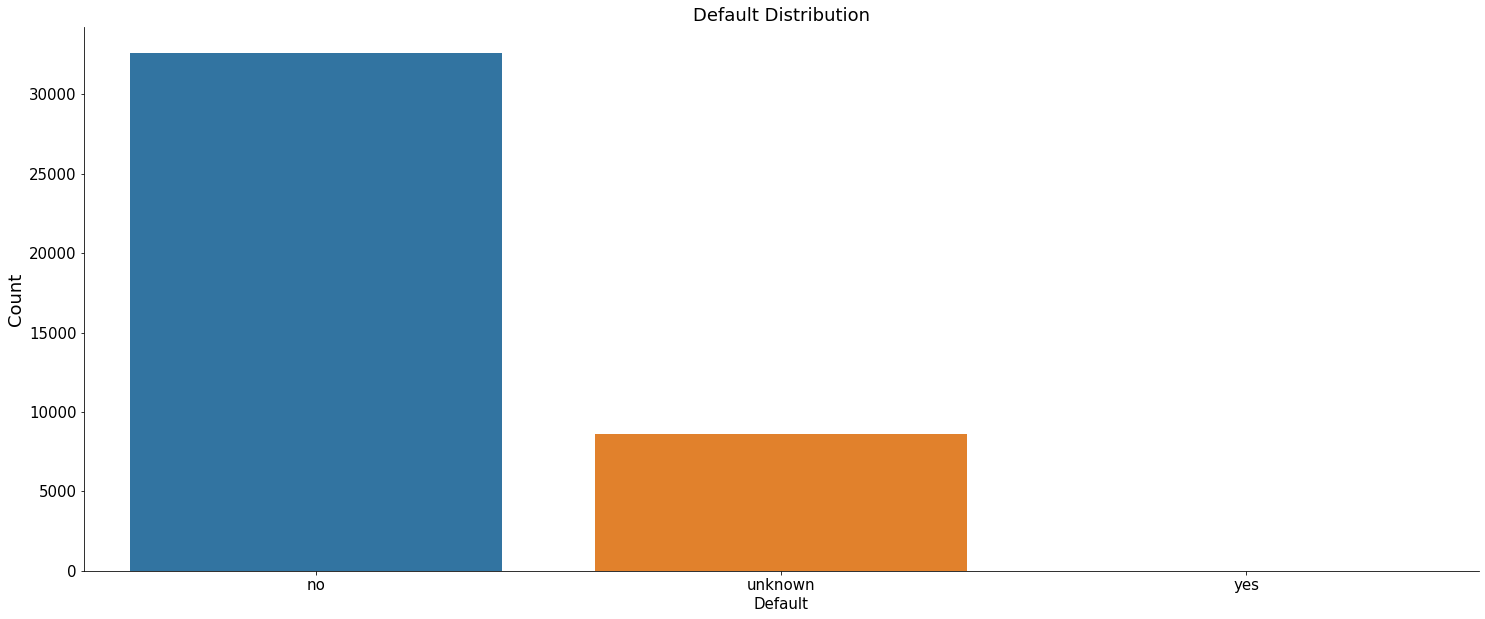

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'default', data = data)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('Default Distribution', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['default'].value_counts()

#### Housing Distribution 

Has housing loan?

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

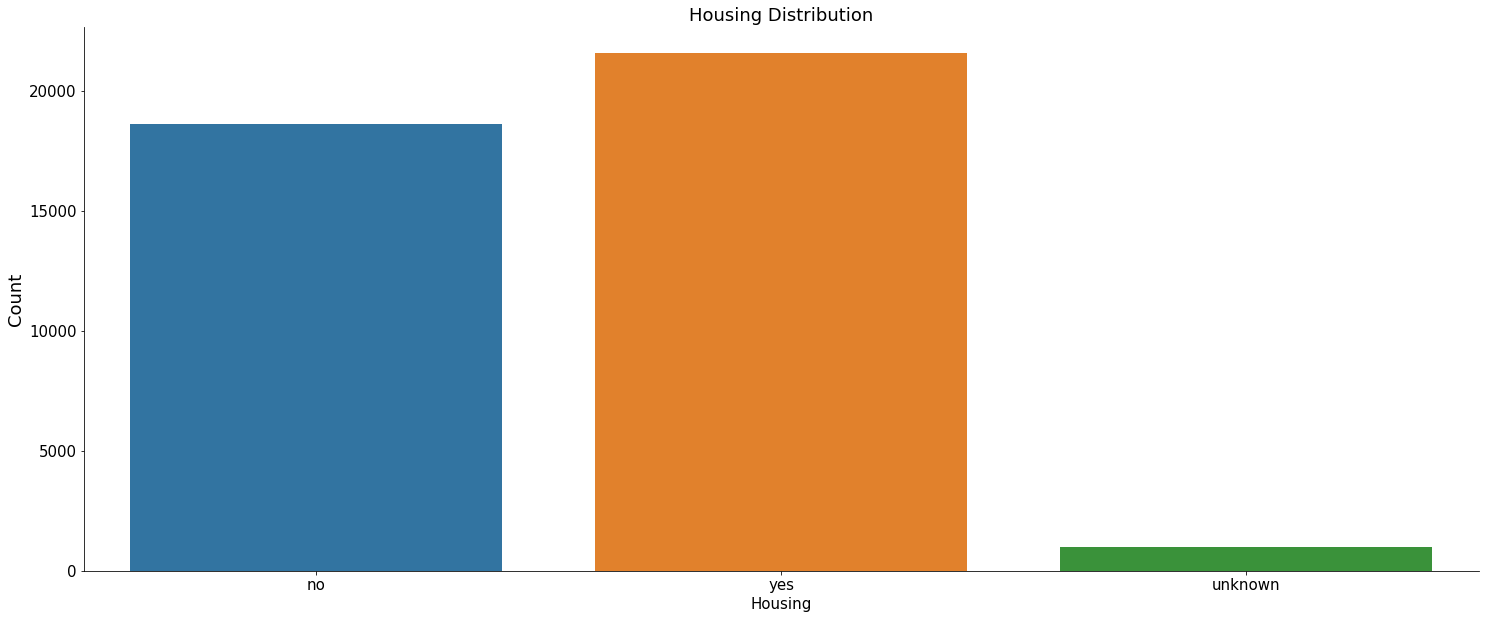

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'housing', data = data)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('Housing Distribution', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['housing'].value_counts()

#### Loan Distribution 

Has personal loan?

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

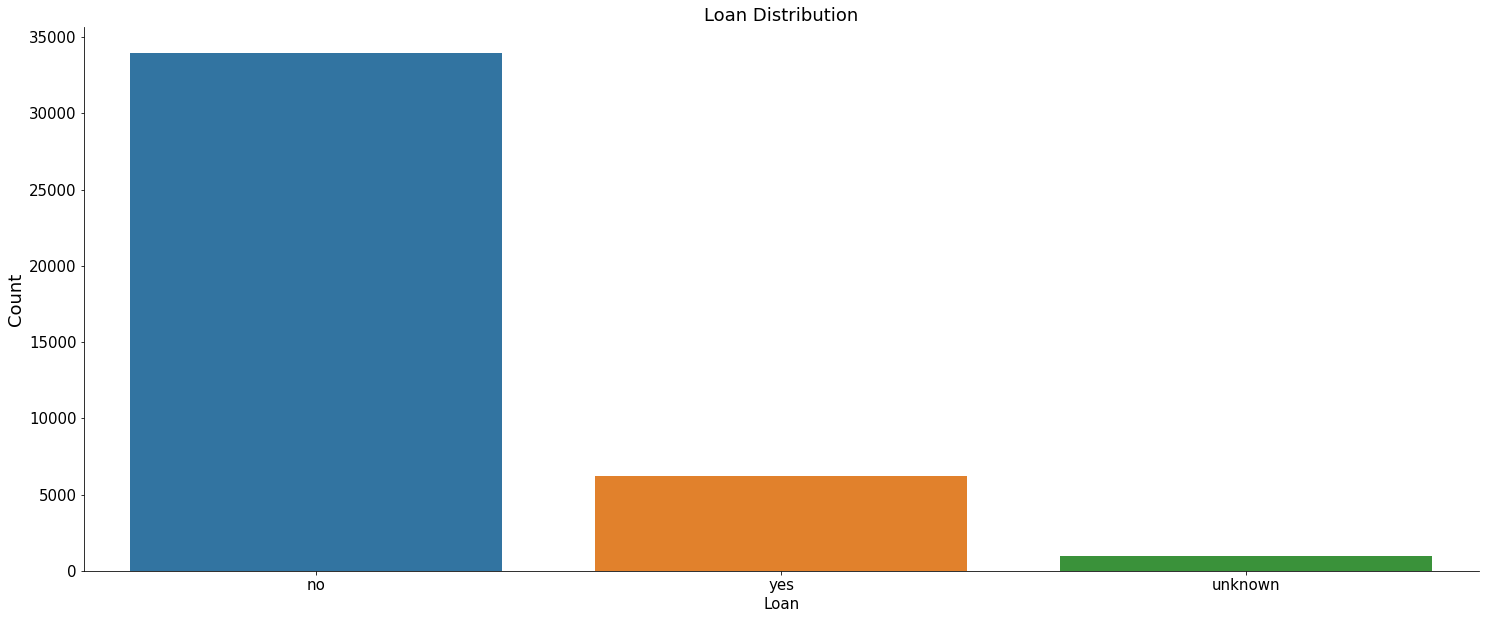

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
sns.countplot(x = 'loan', data = data)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=18)
ax.set_title('Loan Distribution', fontsize=18)
ax.tick_params(labelsize=15)
sns.despine()

data['loan'].value_counts()

## Data Related With the Last Contact of the Current Campaign